# Notebook - Prediction of place

## Lets set up the environment now

In [14]:
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API 
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                         /                                 failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.7.9|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='5_73_pypy|4_73_pypy|3_73_pypy|2_73_pypy|1_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When p

     |████████████████████████████████| 98 kB 7.7 MB/s  eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                             |                                                      failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.7.9|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='1_73_pypy|3_73_pypy|4_73_pypy|5_73_pypy|2_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on

Libraries imported.


In [19]:

source = requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India').text 
soup = BeautifulSoup(source, 'lxml')

In [24]:
csv_file = open('hyderabad.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [25]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [26]:
csv_file.close()

In [27]:
hyderabad_raw = pd.read_csv('hyderabad.csv')

In [28]:
hyderabad_raw.shape

(179, 1)

In [29]:
hyderabad_raw

,Neighbourhood
0,Badichowdi
1,Bagh Lingampally
2,Bairamalguda
3,"Balapur, Ranga Reddy district"
4,Balkampet
5,Banjara Hills
6,"Bank Street, Hyderabad"
7,"Barkas, Hyderabad"
8,Barkatpura
9,Basheerbagh


In [31]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = hyderabad_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Hyderabad, India'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [32]:
man_data = hyderabad_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [33]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Badichowdi,17.38896,78.48681
1,Bagh Lingampally,17.39931,78.49964
2,Bairamalguda,17.33992,78.54553
3,"Balapur, Ranga Reddy district",17.32281,78.50103
4,Balkampet,17.44854,78.44925


## Let's setup FourSquare credentials.

In [34]:
CLIENT_ID = 'T4AGPPFEB435UPYTHCW4GIRUGUDGHTIOSOED0I5A0VR4SJNG' # your Foursquare ID
CLIENT_SECRET = '5HGAZ1MGL4UBGK0RTHFARTQWLZ3ZSHJXBAKO0SXR3UGBGIW2' # your Foursquare Secret
VERSION = '20210125' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T4AGPPFEB435UPYTHCW4GIRUGUDGHTIOSOED0I5A0VR4SJNG
CLIENT_SECRET:5HGAZ1MGL4UBGK0RTHFARTQWLZ3ZSHJXBAKO0SXR3UGBGIW2


## Now we will get Latitude and Longitude of Manchester.

In [36]:
from geopy.geocoders import Nominatim

address = 'Hyderabad,India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.38878595, 78.46106473453146.


## Let's plot map of Manchester using latitude and longitude values. 

In [37]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

## In the following call we will create a function which will extract the category from the FourSquare vanues. Later we will apply FourSquare API in all the neighbourhoods on Hyderabad.

In [38]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


## Now we will create a dataframe for performing clustering.

In [40]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Badichowdi,17.38896,78.48681,Pragati,South Indian Restaurant,17.388088,78.481134
1,Badichowdi,17.38896,78.48681,Mayur Pan Shop,Juice Bar,17.388894,78.480578
2,Badichowdi,17.38896,78.48681,Santosh Dhaba,Indian Restaurant,17.388485,78.479509
3,Badichowdi,17.38896,78.48681,Gokul Chat Center,Chaat Place,17.384716,78.483152
4,Badichowdi,17.38896,78.48681,Inox Maheshwari Paremeshwari,Multiplex,17.390728,78.488352


In [41]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Juice Bar,Lake,Laser Tag,Light Rail Station,Lighting Store,Lounge,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Neighborhood,New American Restaurant,Nightclub,Office,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Restaurant,River,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tech Startup,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wings Joint,Women's Store,Zoo
0,Badichowdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Badichowdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Badichowdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Badichowdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Badichowdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:

man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Juice Bar,Lake,Laser Tag,Light Rail Station,Lighting Store,Lounge,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Neighborhood,New American Restaurant,Nightclub,Office,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Restaurant,River,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tech Startup,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wings Joint,Women's Store,Zoo
0,"BHEL Township, Hyderabad",0.25,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.25,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.2500,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.25,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1,Badichowdi,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0000,0.1875,0.0,0.0625,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0625,0.0,0.0625,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
2,Bagh Lingampally,0.00,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0625,0.1875,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.1875,0.0,0.0000,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,

In [43]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

## Now we will create a new dataframe to get the top 10 venues.

In [44]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BHEL Township, Hyderabad",ATM,Indian Restaurant,Bakery,Pizza Place,Department Store,Dessert Shop,Deli / Bodega,Diner,Donut Shop,Dumpling Restaurant
1,Badichowdi,Indian Restaurant,Juice Bar,Breakfast Spot,Movie Theater,Middle Eastern Restaurant,South Indian Restaurant,Chaat Place,Indie Movie Theater,Bank,Plaza
2,Bagh Lingampally,Movie Theater,Indian Restaurant,Gym,Breakfast Spot,Ice Cream Shop,Coffee Shop,Shopping Mall,Snack Place,Park,Asian Restaurant
3,Bairamalguda,Pizza Place,Shopping Mall,Fast Food Restaurant,Asian Restaurant,Electronics Store,Flower Shop,Flea Market,Farmers Market,Farm,Falafel Restaurant
4,Balkampet,Train Station,Breakfast Spot,Pizza Place,Department Store,Bus Station,Indian Restaurant,Café,Sandwich Place,Bakery,Farm


In [45]:

man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()


In [47]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

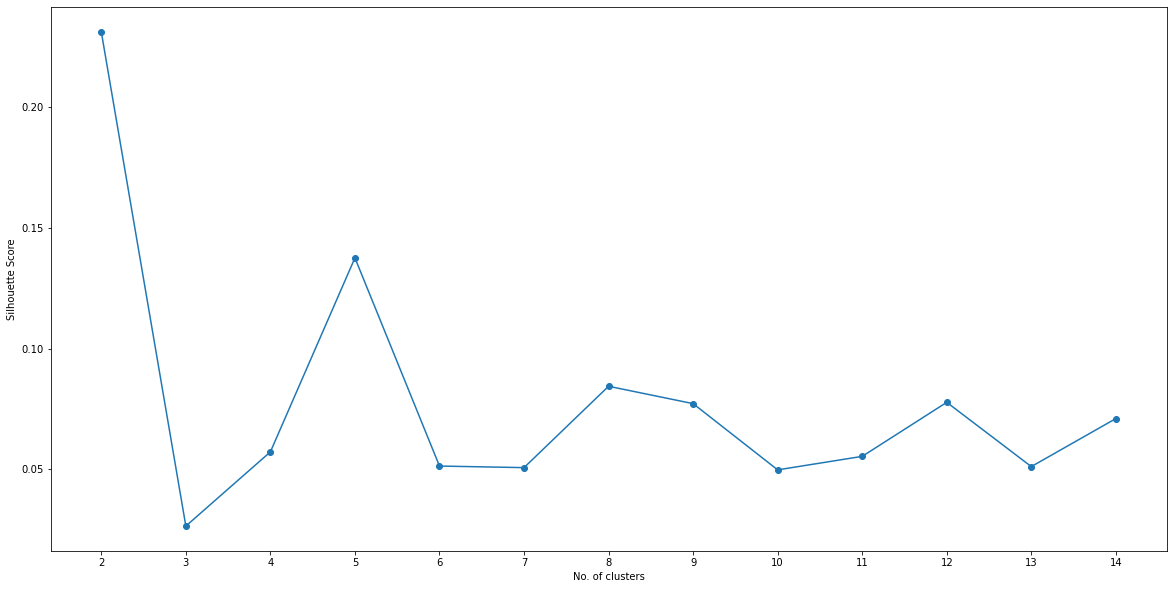

In [48]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

## From the graph the optimal number is found to be 8 using the Elbow Method.

In [49]:
opt_value = 3


## Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering

In [50]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [51]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

## Now we will create a final version of dataframe containing all the necessary data.

In [52]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Badichowdi,17.38896,78.48681,2,Indian Restaurant,Juice Bar,Breakfast Spot,Movie Theater,Middle Eastern Restaurant,South Indian Restaurant,Chaat Place,Indie Movie Theater,Bank,Plaza
1,Bagh Lingampally,17.39931,78.49964,2,Movie Theater,Indian Restaurant,Gym,Breakfast Spot,Ice Cream Shop,Coffee Shop,Shopping Mall,Snack Place,Park,Asian Restaurant
2,Bairamalguda,17.33992,78.54553,0,Pizza Place,Shopping Mall,Fast Food Restaurant,Asian Restaurant,Electronics Store,Flower Shop,Flea Market,Farmers Market,Farm,Falafel Restaurant
4,Balkampet,17.44854,78.44925,0,Train Station,Breakfast Spot,Pizza Place,Department Store,Bus Station,Indian Restaurant,Café,Sandwich Place,Bakery,Farm
5,Banjara Hills,17.41535,78.43435,0,Coffee Shop,Café,Hookah Bar,Asian Restaurant,Pizza Place,Breakfast Spot,Sandwich Place,Pub,Chinese Restaurant,Lounge


In [53]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

## Now lets have a look at all threeclusters.

In [54]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bairamalguda,Pizza Place,Shopping Mall,Fast Food Restaurant,Asian Restaurant,Electronics Store,Flower Shop,Flea Market,Farmers Market,Farm,Falafel Restaurant
4,Balkampet,Train Station,Breakfast Spot,Pizza Place,Department Store,Bus Station,Indian Restaurant,Café,Sandwich Place,Bakery,Farm
5,Banjara Hills,Coffee Shop,Café,Hookah Bar,Asian Restaurant,Pizza Place,Breakfast Spot,Sandwich Place,Pub,Chinese Restaurant,Lounge
7,"Barkas, Hyderabad",Middle Eastern Restaurant,Mediterranean Restaurant,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Zoo
8,Barkatpura,Gym,Coffee Shop,Park,Ice Cream Shop,Snack Place,Café,Movie Theater,Indian Restaurant,Plaza,Platform
9,Basheerbagh,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Dessert Shop,Restaurant,Hotel Bar,Stadium,Gaming Cafe,Lake
11,Begum Bazaar,South Indian Restaurant,Food,Shopping Mall,Diner,Indian Restaurant,Bus Station,Breakfast Spot,Zoo,Farmers Market,Flower Shop
13,Bharat Nagar,Platform,Golf Course,Bus Station,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store
15,Boggulkunta,Indian Restaurant,Hotel,Fast Food Restaurant,Shoe Store,Juice Bar,Indie Movie Theater,Farmers Market,Shopping Mall,Café,Department Store
16,Bolarum,Lighting Store,Bus Station,Athletics & Sports,Zoo,Farm,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market


In [55]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Borabanda,ATM,Café,Train Station,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
25,Cherlapally,ATM,Diner,Movie Theater,Tennis Court,Department Store,Dessert Shop,Deli / Bodega,Donut Shop,Dumpling Restaurant,Food & Drink Shop
36,ECIL X Roads,ATM,Café,Food Court,Pharmacy,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
37,Edi Bazar,ATM,Mattress Store,Ice Cream Shop,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Farm
60,Jagadgirigutta,ATM,Food Court,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store
62,Jalal Baba Nagar,ATM,Indian Restaurant,Electronics Store,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
71,Karmanghat,ATM,Department Store,Clothing Store,Farm,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
84,Kushaiguda,ATM,Ice Cream Shop,Motorcycle Shop,Indie Movie Theater,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
95,Macha Bollaram,ATM,Gym / Fitness Center,Mattress Store,Lake,Pharmacy,Harbor / Marina,Food,Dance Studio,Deli / Bodega,Department Store
96,Madannapet,ATM,Train Station,Bakery,Restaurant,Irani Cafe,Breakfast Spot,Department Store,Farm,Food & Drink Shop,Food


In [56]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Badichowdi,Indian Restaurant,Juice Bar,Breakfast Spot,Movie Theater,Middle Eastern Restaurant,South Indian Restaurant,Chaat Place,Indie Movie Theater,Bank,Plaza
1,Bagh Lingampally,Movie Theater,Indian Restaurant,Gym,Breakfast Spot,Ice Cream Shop,Coffee Shop,Shopping Mall,Snack Place,Park,Asian Restaurant
6,"Bank Street, Hyderabad",Indian Restaurant,Hotel,Bakery,Juice Bar,Farmers Market,Fast Food Restaurant,Ice Cream Shop,Fried Chicken Joint,Mobile Phone Shop,Chaat Place
10,Bazarghat,Indian Restaurant,Hotel,Ice Cream Shop,Hyderabadi Restaurant,Hotel Bar,Lounge,Science Museum,Middle Eastern Restaurant,South Indian Restaurant,Café
12,Begumpet,Indian Restaurant,Bakery,Hotel,Train Station,Thai Restaurant,Hyderabadi Restaurant,Sandwich Place,Clothing Store,Café,Restaurant
14,"BHEL Township, Hyderabad",ATM,Indian Restaurant,Bakery,Pizza Place,Department Store,Dessert Shop,Deli / Bodega,Diner,Donut Shop,Dumpling Restaurant
20,Champapet,Mattress Store,Vegetarian / Vegan Restaurant,Indian Restaurant,Garden Center,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
21,Chanchalguda,Indian Restaurant,Hotel,Train Station,Burger Joint,Middle Eastern Restaurant,Food Truck,Convenience Store,Gym,Health & Beauty Service,Dance Studio
26,Chikkadpally,Movie Theater,Indian Restaurant,Ice Cream Shop,Snack Place,Park,Breakfast Spot,Café,Bakery,Shopping Mall,Asian Restaurant
27,Chilkalguda,Train Station,Indian Restaurant,Bakery,Vegetarian / Vegan Restaurant,Grocery Store,Zoo,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market


## After studying all three clusters, it is recommended to the client that neighbourhoods such as Barlow Moor, Brookelands and Hyde Newton(Ward) that fall in cluster 4 look like good locations for starting a restaurant. The client can go ahead and make a decision depending on othr factors like availability and legal requirements that are out of scope of this project.